In [17]:
#import tensorflow 
import tensorflow as tf
# You can avoid the long names by using
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [18]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'font.family': 'DejaVu Sans',
          'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
# sns.set_style("white")

In [19]:
# Read the `cosine.csv` file
df = pd.read_csv('cosine.csv')

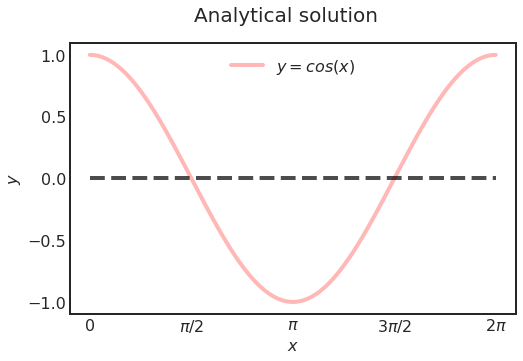

In [20]:
x,y = df.x.values.reshape(-1,1),df.y.values.reshape(-1,1)

fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x,y,label='$y = cos(x)$',color ='#FF9A98',lw=4,alpha=0.7)
ax.plot([0,6.28],[0,0],'--',color ='k',lw=4,alpha=0.7)
ax.set_xlabel('$x$',fontsize=16)
ax.set_ylabel('$y$',fontsize=16)
ax.legend(loc='upper center')
ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$', r'$\pi$'
          , r'$3\pi/2$', r'$2\pi$']
ax.set_xticklabels(labels)

fig.suptitle('Analytical solution',fontsize=20);

In [ ]:
x.shape

(1000, 1)

## Backpropagation using tensorflow

In [8]:
# Define your neural network as per the instructions

mlp = tf.keras.Sequential()
mlp.add(tf.keras.Input(shape=(1,)))
mlp.add(tf.keras.layers.Dense(32,activation = "elu"))
mlp.add(tf.keras.layers.Dense(1,))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [16]:
temp = tf.random.normal((3, 2))
print(temp)
print([[1,2,3]]@temp)

tf.Tensor(
[[-0.24839355 -0.02511652]
 [ 1.4492947   1.7222148 ]
 [-1.0630769   0.83332783]], shape=(3, 2), dtype=float32)
tf.Tensor([[-0.5390347  5.9192967]], shape=(1, 2), dtype=float32)


In [26]:
# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Instantiate an optimizer
optimizer = tf.keras.optimizers.Adam(lr=0.01)

# Initialize a list to store the losses
losses = []

# Define number of epochs
num_epochs = 4000

# Run a loop for the number of epochs
for i in range(num_epochs):

    # Open a GradientTape
    with tf.GradientTape() as tape:

        # Forward pass.
        output = mlp(x)

        # Loss value for this batch.
        loss = loss_fn(y,output)

    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss,mlp.trainable_variables)

    # Update the weights of our linear layer.
    # Use optimizer.apply_gradients() function
    optimizer.apply_gradients(zip(gradients,mlp.trainable_variables))
        
    # Append the loss to the losses list
    losses.append(loss)
    
    # For every 100th epoch print the loss
    if i%100==0:
        print(f'Loss is {loss} at epoch {i}')


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Loss is 0.9100071787834167 at epoch 0
Loss is 0.10676230490207672 at epoch 100
Loss is 0.016519686207175255 at epoch 200
Loss is 0.012151597999036312 at epoch 300
Loss is 0.011396476998925209 at epoch 400
Loss is 0.01086715143173933 at epoch 500
Loss is 0.010731056332588196 at epoch 600
Loss is 0.010140445083379745 at epoch 700
Loss is 0.009846111759543419 at epoch 800
Loss is 0.01260925643146038 at epoch 900
Loss is 0.009318366646766663 at epoch 1000
Loss is 0.009807792492210865 at epoch 1100
Loss is 0.008822073228657246 at epoch 1200
Loss is 0.008526376448571682 at epoch 1300
Loss is 0.008135715499520302 at epoch 1400
Loss is 0.0073663233779370785 at epoch 1500
Loss is 0.00585181824862957 at epoch 1600
Loss is 0.004716652445495129 at epoch 1700
Loss is 0.004323309287428856 at epoch 1800
Loss is 0.004121093545109034 at epoch 1900
Loss is 0.00476462859660387 at epoch 2000
Loss is 0.0039035696536302567 at epoch 2100
Loss is 0.0038303076289594173 at epoch 2200
Loss is 0.00376620213501155

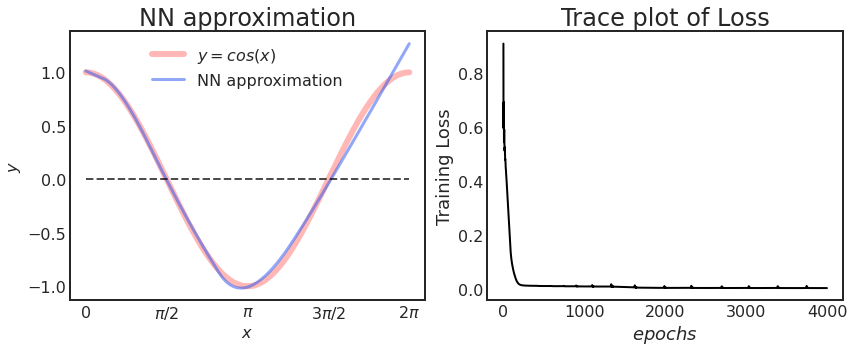

In [27]:
# Use the helper code below to visualize your results

y_pred = mlp.predict(x)
fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(x,y,label='$y=cos(x)$',color ='#FF9A98',lw=6,alpha=0.7)
axes[0].plot(x,y_pred,'-',label='NN approximation',color ='#2252f0',lw=3,alpha=0.5,markersize=10)
axes[0].plot([0,6.28],[0,0],'--',color ='k',lw=2,alpha=0.7)
axes[0].set_xlabel('$x$',fontsize=16)
axes[0].set_ylabel('$y$',fontsize=16)
axes[0].legend(loc='upper center')
axes[0].set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$', r'$\pi$'
          , r'$3\pi/2$', r'$2\pi$']
axes[0].set_xticklabels(labels)

axes[1].plot(losses,lw=2,color='k')
axes[1].set_title('Trace plot of Loss',fontsize=24);
axes[1].set_xlabel('$epochs$',fontsize=18)
axes[1].set_ylabel('Training Loss',fontsize=18)


axes[0].set_title('NN approximation',fontsize=24);
plt.tight_layout()